In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import *
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)
plt.style.use( 'seaborn-v0_8')


In [3]:
def replace_TF(x):
    if x == False:
        return 0
    elif x == True:
        return 1
    else:
        return x

def nums_to_groups(x, s):
    s.sort()
    i = 0
    while i < len(s) and x > s[i]:
        i += 1
    return i

In [4]:
train_path = "spaceship-titanic/train.csv"
train_data = pd.read_csv(train_path)
train_data.head(13)

test_path = "spaceship-titanic/test.csv"
test_data = pd.read_csv(test_path)

In [5]:
train_data[['Deck', 'Num', 'Side']] = train_data['Cabin'].str.split('/', expand=True)
test_data[['Deck', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

In [6]:
train_data.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Deck,Num,Side
count,8693,8492,8476,8494,8511,8490,8493,8494,8494,8494
unique,8693,3,2,6560,3,2,8473,8,1817,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody,F,82,S
freq,1,4602,5439,8,5915,8291,2,2794,28,4288


In [7]:
train_data = train_data.map(replace_TF)

train_data.loc[train_data['RoomService'].isnull(), 'RoomService'] = train_data['RoomService'].median()
train_data.loc[train_data['FoodCourt'].isnull(), 'FoodCourt'] = train_data['FoodCourt'].median()
train_data.loc[train_data['ShoppingMall'].isnull(), 'ShoppingMall'] = train_data['ShoppingMall'].median()
train_data.loc[train_data['Spa'].isnull(), 'Spa'] = train_data['Spa'].median()
train_data.loc[train_data['VRDeck'].isnull(), 'VRDeck'] = train_data['VRDeck'].median()
train_data.loc[train_data['Age'].isnull(), 'Age'] = train_data['Age'].median()
train_data.loc[train_data['VIP'].isnull(), 'VIP'] = train_data['VIP'].median()
train_data.loc[train_data['Deck'].isnull(), 'Deck'] = "F"
train_data.loc[train_data['Side'].isnull(), 'Side'] = 'S'
train_data.loc[train_data['HomePlanet'].isnull(), 'HomePlanet'] = 'Earth'
train_data.loc[train_data['CryoSleep'].isnull(), 'CryoSleep'] = train_data['CryoSleep'].median()
train_data.loc[train_data['Destination'].isnull(), 'Destination'] = 'TRAPPIST-1e'

test_data = test_data.map(replace_TF)

test_data.loc[test_data['RoomService'].isnull(), 'RoomService'] = train_data['RoomService'].median()
test_data.loc[test_data['FoodCourt'].isnull(), 'FoodCourt'] = train_data['FoodCourt'].median()
test_data.loc[test_data['ShoppingMall'].isnull(), 'ShoppingMall'] = train_data['ShoppingMall'].median()
test_data.loc[test_data['Spa'].isnull(), 'Spa'] = train_data['Spa'].median()
test_data.loc[test_data['VRDeck'].isnull(), 'VRDeck'] = train_data['VRDeck'].median()
test_data.loc[test_data['Age'].isnull(), 'Age'] = train_data['Age'].median()
test_data.loc[test_data['VIP'].isnull(), 'VIP'] = train_data['VIP'].median()
test_data.loc[test_data['Deck'].isnull(), 'Deck'] = "F"
test_data.loc[test_data['Side'].isnull(), 'Side'] = 'S'
test_data.loc[test_data['HomePlanet'].isnull(), 'HomePlanet'] = 'Earth'
test_data.loc[test_data['CryoSleep'].isnull(), 'CryoSleep'] = train_data['CryoSleep'].median()
test_data.loc[test_data['Destination'].isnull(), 'Destination'] = 'TRAPPIST-1e'


In [8]:
# Переводим Age в категориальный признак
train_data['Age'] = train_data['Age'].apply(nums_to_groups, args=[[10, 20, 30, 40, 50, 60]])
train_data.rename(columns = {'Age' : 'AgeGroup'}, inplace=True)

# Переводим RoomService в категориальный признак
train_data['RoomService'] = train_data['RoomService'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
train_data.rename(columns = {'RoomService' : 'RoomServiceGroup'}, inplace=True)

# Переводим FoodCourt в категориальный признак
train_data['FoodCourt'] = train_data['FoodCourt'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
train_data.rename(columns = {'FoodCourt' : 'FoodCourtGroup'}, inplace=True)

# Переводим ShoppingMall в категориальный признак
train_data['ShoppingMall'] = train_data['ShoppingMall'].apply(nums_to_groups, args=[[1, 100, 600]])
train_data.rename(columns = {'ShoppingMall' : 'ShoppingMallGroup'}, inplace=True)

# Переводим Spa в категориальный признак
train_data['Spa'] = train_data['Spa'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
train_data.rename(columns = {'Spa' : 'SpaGroup'}, inplace=True)

# Переводим VRDeck в категориальный признак
train_data['VRDeck'] = train_data['VRDeck'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
train_data.rename(columns = {'VRDeck' : 'VRDeckGroup'}, inplace=True)

# Переводим Age в категориальный признак
test_data['Age'] = test_data['Age'].apply(nums_to_groups, args=[[10, 20, 30, 40, 50, 60]])
test_data.rename(columns = {'Age' : 'AgeGroup'}, inplace=True)

# Переводим RoomService в категориальный признак
test_data['RoomService'] = test_data['RoomService'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
test_data.rename(columns = {'RoomService' : 'RoomServiceGroup'}, inplace=True)

# Переводим FoodCourt в категориальный признак
test_data['FoodCourt'] = test_data['FoodCourt'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
test_data.rename(columns = {'FoodCourt' : 'FoodCourtGroup'}, inplace=True)

# Переводим ShoppingMall в категориальный признак
test_data['ShoppingMall'] = test_data['ShoppingMall'].apply(nums_to_groups, args=[[1, 100, 600]])
test_data.rename(columns = {'ShoppingMall' : 'ShoppingMallGroup'}, inplace=True)

# Переводим Spa в категориальный признак
test_data['Spa'] = test_data['Spa'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
test_data.rename(columns = {'Spa' : 'SpaGroup'}, inplace=True)

# Переводим VRDeck в категориальный признак
test_data['VRDeck'] = test_data['VRDeck'].apply(nums_to_groups, args=[[1, 100, 500, 1000]])
test_data.rename(columns = {'VRDeck' : 'VRDeckGroup'}, inplace=True)

In [9]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,AgeGroup,VIP,RoomServiceGroup,FoodCourtGroup,ShoppingMallGroup,SpaGroup,VRDeckGroup,Name,Deck,Num,Side
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,2,0.0,0,0,0,0,0,Nelly Carsoning,G,3,S
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,1,0.0,0,1,0,4,0,Lerome Peckers,F,4,S
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,3,0.0,0,0,0,0,0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,3,0.0,0,4,0,2,3,Meratz Caltilter,C,1,S
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,1,0.0,1,0,3,0,0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1.0,G/1496/S,TRAPPIST-1e,3,0.0,0,0,0,0,0,Jeron Peter,G,1496,S
4273,9269_01,Earth,0.0,NaN,TRAPPIST-1e,4,0.0,0,3,1,1,2,Matty Scheron,F,NaN,S
4274,9271_01,Mars,1.0,D/296/P,55 Cancri e,2,0.0,0,0,0,0,0,Jayrin Pore,D,296,P
4275,9273_01,Europa,0.0,D/297/P,TRAPPIST-1e,2,0.0,0,4,0,0,3,Kitakan Conale,D,297,P


<Axes: xlabel='HomePlanet', ylabel='Transported people proportion'>

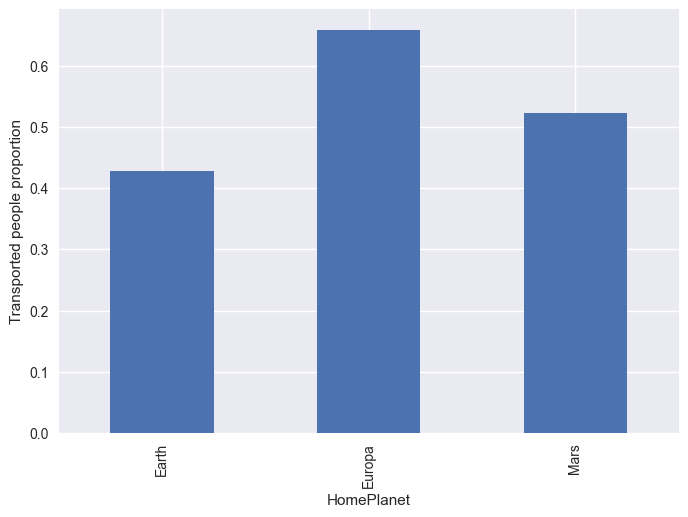

In [10]:
train_data.groupby('HomePlanet')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='VIP', ylabel='Transported people proportion'>

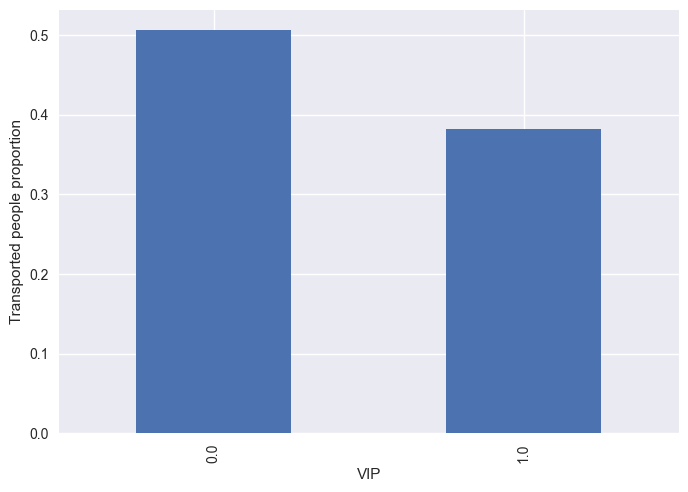

In [11]:
train_data.groupby('VIP')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='Destination', ylabel='Transported people proportion'>

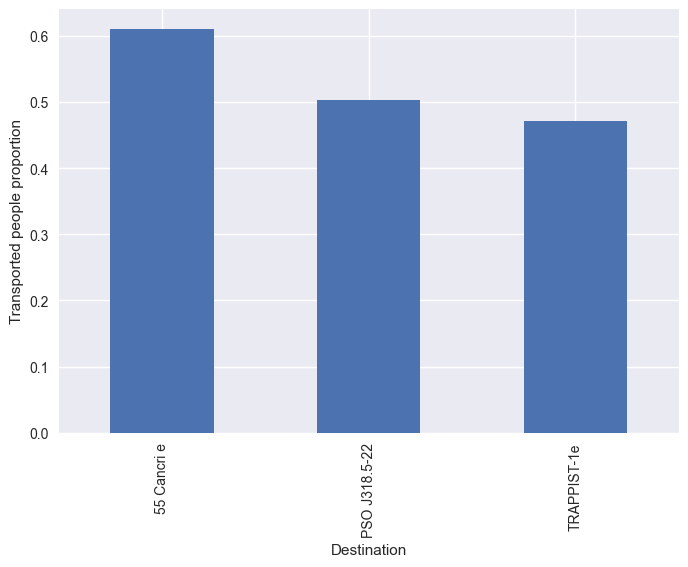

In [12]:
train_data.groupby('Destination')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='CryoSleep', ylabel='Transported people proportion'>

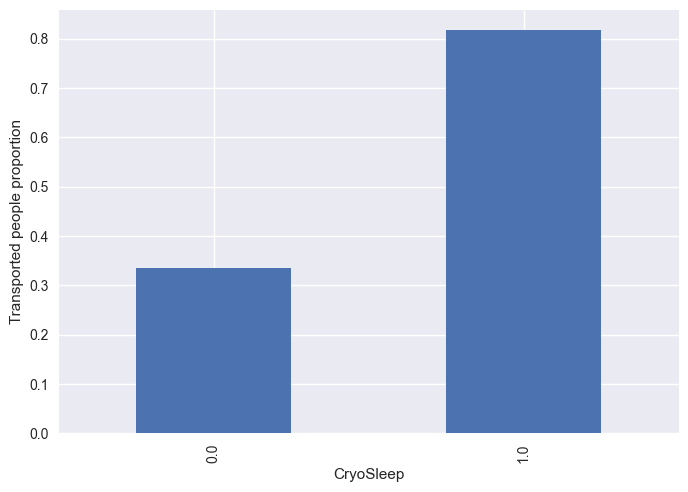

In [13]:
train_data.groupby('CryoSleep')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='VIP', ylabel='Transported people proportion'>

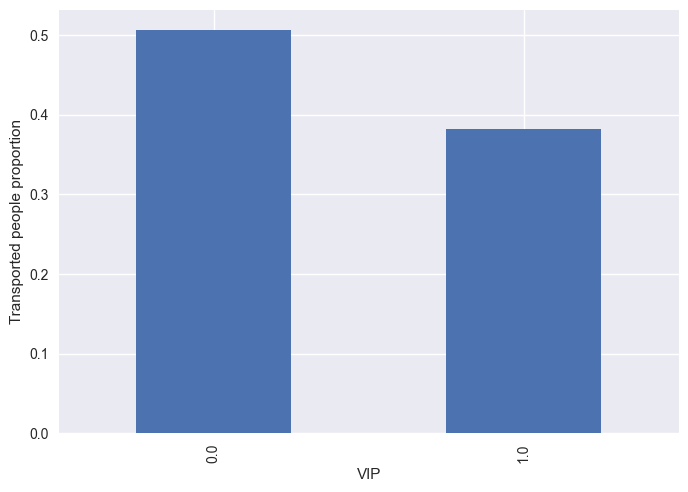

In [14]:
train_data.groupby('VIP')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='Deck', ylabel='Transported people proportion'>

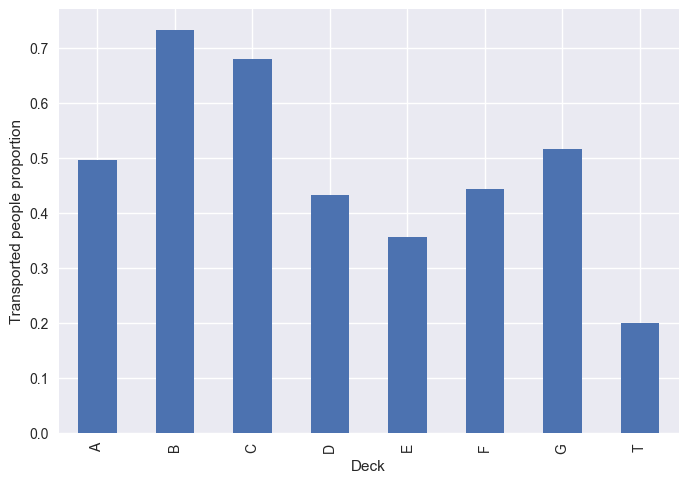

In [15]:
train_data.groupby('Deck')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='Side', ylabel='Transported people proportion'>

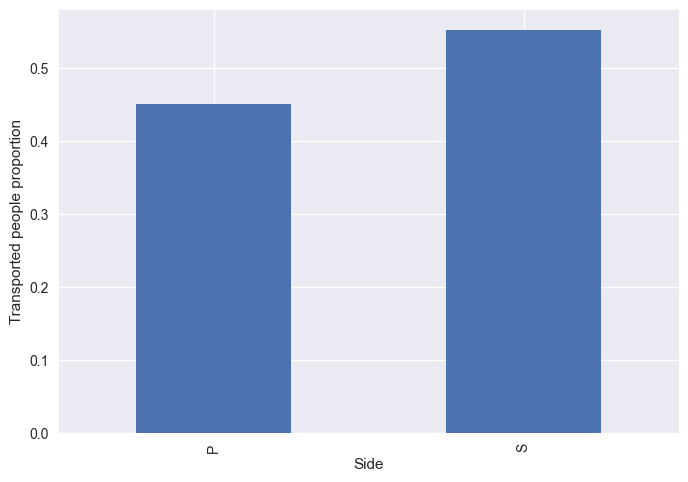

In [16]:
train_data.groupby('Side')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='AgeGroup', ylabel='Transported people proportion'>

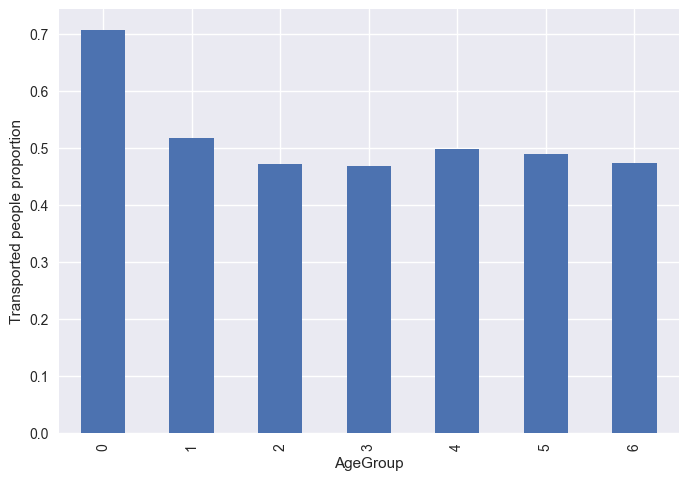

In [17]:
train_data.groupby('AgeGroup')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='RoomServiceGroup', ylabel='Transported people proportion'>

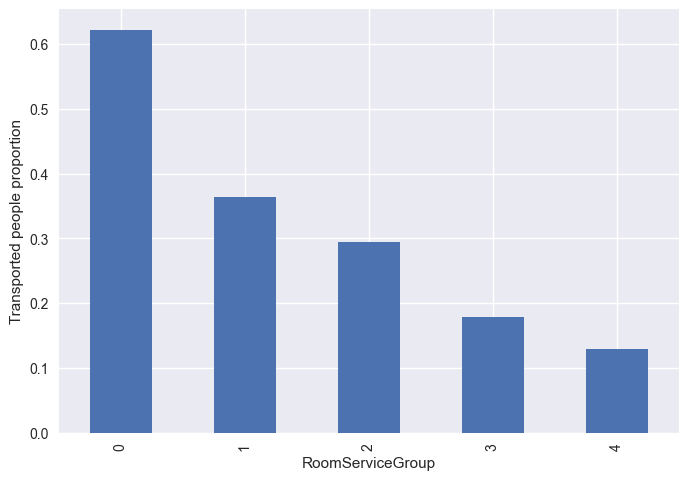

In [18]:
train_data.groupby('RoomServiceGroup')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='FoodCourtGroup', ylabel='Transported people proportion'>

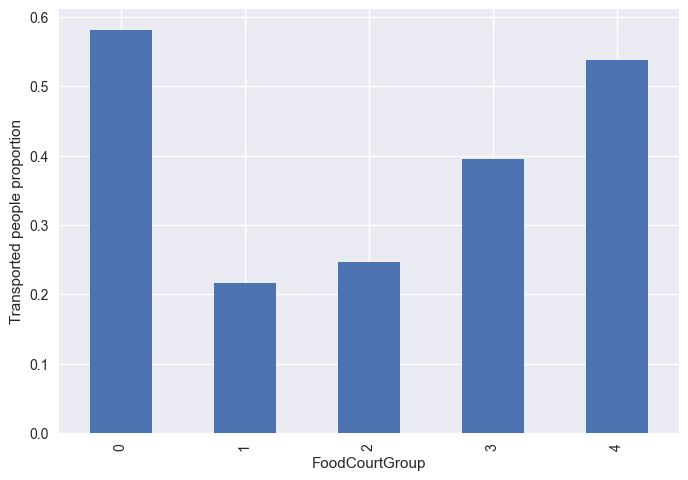

In [19]:
train_data.groupby('FoodCourtGroup')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='ShoppingMallGroup', ylabel='Transported people proportion'>

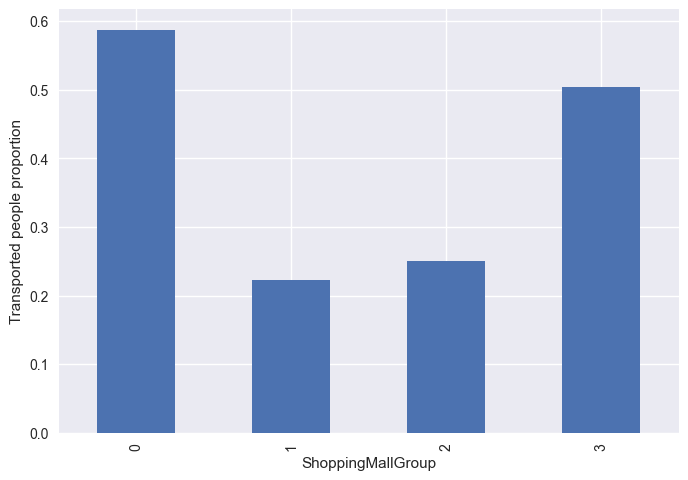

In [20]:
train_data.groupby('ShoppingMallGroup')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='SpaGroup', ylabel='Transported people proportion'>

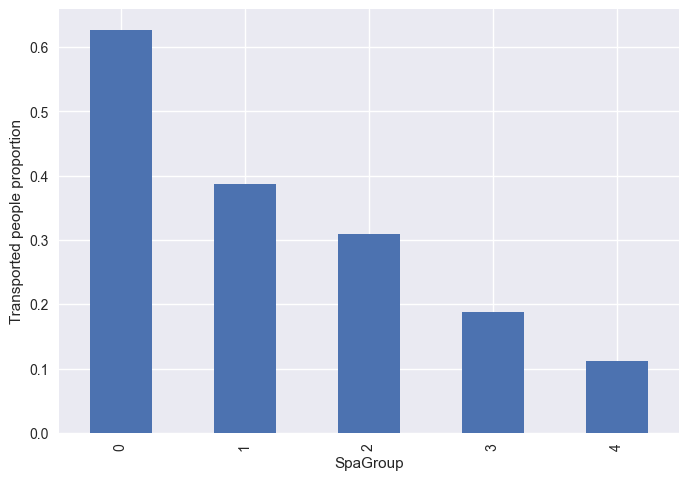

In [21]:
train_data.groupby('SpaGroup')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

<Axes: xlabel='VRDeckGroup', ylabel='Transported people proportion'>

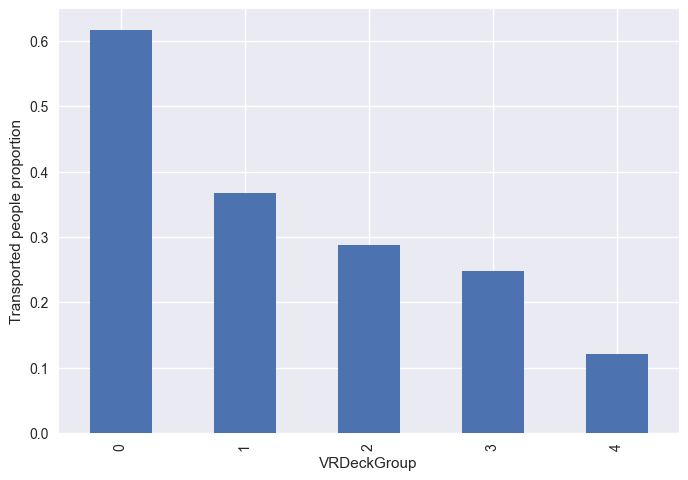

In [22]:
train_data.groupby('VRDeckGroup')['Transported'].mean().plot(kind='bar', ylabel="Transported people proportion")

In [23]:
train_data['Side'] = train_data['Side'].map({'P': 0, 'S': 1})
train_data['Deck'] = train_data['Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})
train_data['HomePlanet'] = train_data['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2})
train_data['Destination'] = train_data['Destination'].map({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2})

In [24]:
test_data['Side'] = test_data['Side'].map({'P': 0, 'S': 1})
test_data['Deck'] = test_data['Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})
test_data['HomePlanet'] = test_data['HomePlanet'].map({'Earth': 0, 'Europa': 1, 'Mars': 2})
test_data['Destination'] = test_data['Destination'].map({'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2})

In [25]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,AgeGroup,VIP,RoomServiceGroup,FoodCourtGroup,ShoppingMallGroup,SpaGroup,VRDeckGroup,Name,Transported,Deck,Num,Side
0,0001_01,1,0.0,B/0/P,0,3,0.0,0,0,0,0,0,Maham Ofracculy,0,1,0,0
1,0002_01,0,0.0,F/0/S,0,2,0.0,2,1,1,3,1,Juanna Vines,1,5,0,1
2,0003_01,1,0.0,A/0/S,0,5,1.0,1,4,0,4,1,Altark Susent,0,0,0,1
3,0003_02,1,0.0,A/0/S,0,3,0.0,0,4,2,4,2,Solam Susent,0,0,0,1
4,0004_01,0,0.0,F/1/S,0,1,0.0,2,1,2,3,1,Willy Santantines,1,5,1,1


In [26]:
# убираем неинтересующие нас столбцы
train_data.drop(columns=['PassengerId', 'Cabin', 'Name', 'Num'], inplace=True)
test_data.drop(columns=['Cabin', 'Name', 'Num'], inplace=True)
train_data.isnull().sum()

HomePlanet           0
CryoSleep            0
Destination          0
AgeGroup             0
VIP                  0
RoomServiceGroup     0
FoodCourtGroup       0
ShoppingMallGroup    0
SpaGroup             0
VRDeckGroup          0
Transported          0
Deck                 0
Side                 0
dtype: int64

In [27]:
X_train = train_data.drop('Transported', axis=1)
y_train = train_data['Transported']

X_test = test_data.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((8693, 12), (8693,), (4277, 12))

In [28]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [29]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

90.99


In [30]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Transported": y_pred_random_forest
    })

submission['Transported'] = submission['Transported'].map({0 : False, 1 : True})

submission.to_csv('submission.csv', index=False)